In [91]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm

import xgboost as xgb

import pickle
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
csvf= ['urldata2.csv','urldata3.csv', 'urldata4.csv', 'urldata5.csv', 'urldata5.5.csv', 'urldata6.csv', 'urldata7.csv', 'urldata8.csv', 'urldata9.csv', 'urldata10.csv', 'urldata11.csv',
         'urldata12.csv', 'urldata13.csv', 'urldata14.csv', 'urldata15.csv', 'urldata16.csv', 'urldata17.csv', 'urldata18.csv', 'urldata19.csv', 'urldata20.csv', 'urldata21.csv', 'urldata22.csv',
         'urldata22.5.csv', 'urldata23.csv', 'urldata23.5.csv','urldata24.csv', 'urldata24.5.csv', 'urldata25.csv', 'urldata25.5.csv', 'urldata27.csv', 'urldata27.5.csv', 'urldata28.csv', 'urldata28.5.csv',
          'urldata29.csv', 'urldata29.5.csv', 'urldata30.csv', 'urldata30.5.csv', 'urldata31.csv', 'urldata31.5.csv', 'urldata32.csv', 'urldata33.csv', 'urldata35.csv',
         'urldata36.csv', 'urldata37.csv', 'urldata38.csv', 'urldata39.csv', 'urldata40.csv', 'urldata41.csv', 'urldata42.csv', 'urldata43.csv', 'urldata44.csv', 'urldata45.csv', 'urldata46.csv', 'urldata47.csv', 
         'urldata48.csv', 'urldata49.csv', 'urldata50.csv', 'urldata51.csv','urldata52.csv', 'urldata53.csv']
          

In [86]:
cols = ['observedFirstPaint','firstContentfulPaint','observedFirstContentfulPaint', 'firstMeaningfulPaint','observedFirstMeaningfulPaint', 
       'cumulativeLayoutShift', 'observedCumulativeLayoutShift','cumulativeLayoutShiftMainFrame','observedCumulativeLayoutShiftMainFrame',
       'totalCumulativeLayoutShift', 'observedTotalCumulativeLayoutShift', 'interactive','observedDomContentLoaded',
       'largestContentfulPaint','observedLargestContentfulPaint', 'observedLoad','totalBlockingTime','speedIndex','observedSpeedIndex'
       ]

In [60]:
frame1 = pd.read_csv('urldata8.csv', index_col = 'Unnamed: 0' )
frame1

,observedFirstPaint,firstContentfulPaint,observedFirstContentfulPaint,firstMeaningfulPaint,observedFirstMeaningfulPaint,cumulativeLayoutShift,observedCumulativeLayoutShift,cumulativeLayoutShiftMainFrame,observedCumulativeLayoutShiftMainFrame,totalCumulativeLayoutShift,observedTotalCumulativeLayoutShift,interactive,observedDomContentLoaded,largestContentfulPaint,observedLargestContentfulPaint,observedLoad,totalBlockingTime,observedTimeOrigin,speedIndex,observedSpeedIndex
0,1183,574,1183,574,1183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,574,1158,574,1183,1797,0,0,957,1189
1,2528,800,2528,800,2582,0.111753,0.111753,0.111753,0.111753,0.111753,0.111753,2206,2574,1392,2996,3592,28,0,2714,2831
2,624,960,624,960,624,0.004058,0.004058,0.004058,0.004058,0.004058,0.004058,2847,641,960,624,1942,82,0,1174,680
3,381,196,381,196,381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,196,364,460,489,411,0,0,317,412
4,2411,1154,2411,1174,2477,0.110308,0.110308,0.110308,0.110308,0.110308,0.110308,4314,3034,5329,3609,7319,48,0,4098,4119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1064,2694,1064,2694,1247,0.013662,0.013662,0.013662,0.013662,0.013662,0.013662,4547,1298,4150,1522,1397,48,0,2905,1482
996,731,380,731,380,775,0.006612,0.006612,0.006612,0.006612,0.006612,0.006612,5164,731,1698,1306,1750,1671,0,2182,1158
997,691,770,691,770,691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,770,610,890,888,835,0,0,939,793
998,763,1140,763,1140,826,0.006491,0.006491,0.006491,0.006491,0.006491,0.006491,2133,1036,1521,826,1120,133,0,1238,847


In [51]:
frames = []

In [61]:
for f in csvf:
    df = pd.read_csv(f, index_col = 'Unnamed: 0' )
    frames.append(df)

In [65]:
urldata_pm = pd.concat(frames, ignore_index=True)
urldata_pm.to_csv('urldata_pm.csv')

In [67]:
urldata_pm.describe()

,observedFirstPaint,firstContentfulPaint,observedFirstContentfulPaint,firstMeaningfulPaint,observedFirstMeaningfulPaint,cumulativeLayoutShift,observedCumulativeLayoutShift,cumulativeLayoutShiftMainFrame,observedCumulativeLayoutShiftMainFrame,totalCumulativeLayoutShift,observedTotalCumulativeLayoutShift,interactive,observedDomContentLoaded,largestContentfulPaint,observedLargestContentfulPaint,observedLoad,totalBlockingTime,observedTimeOrigin,speedIndex,observedSpeedIndex
count,61000.000000,61000.000000,61000.000000,61000.000000,61000.000000,61000.000000,61000.000000,61000.000000,61000.000000,61000.000000,61000.000000,61000.000000,61000.000000,61000.000000,61000.000000,61000.000000,61000.000000,61000.0,61000.000000,61000.000000
mean,986.746443,645.090115,1014.857311,740.772787,1168.097197,0.056264,0.056264,0.055494,0.055494,0.058601,0.058601,1697.511639,1253.205213,1350.370164,1406.058836,2102.133492,115.892885,0.0,1555.200066,1493.075803
std,1391.921786,583.325337,1421.669209,748.905735,1577.437446,0.160147,0.160147,0.159619,0.159619,0.177290,0.177290,2251.200685,1747.121333,1645.625894,1951.154810,2843.884912,385.662974,0.0,1721.518852,1928.774721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,577.000000,690.000000,598.000000,736.000000,713.000000,0.000538,0.000538,0.000459,0.000459,0.000476,0.000476,880.000000,732.000000,1051.000000,789.000000,1188.000000,0.000000,0.0,1143.000000,894.000000
75%,1340.000000,1000.000000,1387.000000,1088.000000,1610.000000,0.031457,0.031457,0.030199,0.030199,0.031397,0.031397,2505.000000,1734.000000,1854.000000,1896.000000,2969.000000,53.000000,0.0,2358.000000,2154.000000
max,13661.000000,14840.000000,13661.000000,15000.000000,22266.000000,7.989641,7.989641,7.989641,7.989641,7.989641,7.989641,34579.000000,22599.000000,30185.000000,30488.000000,31550.000000,15122.000000,0.0,19479.000000,26374.000000


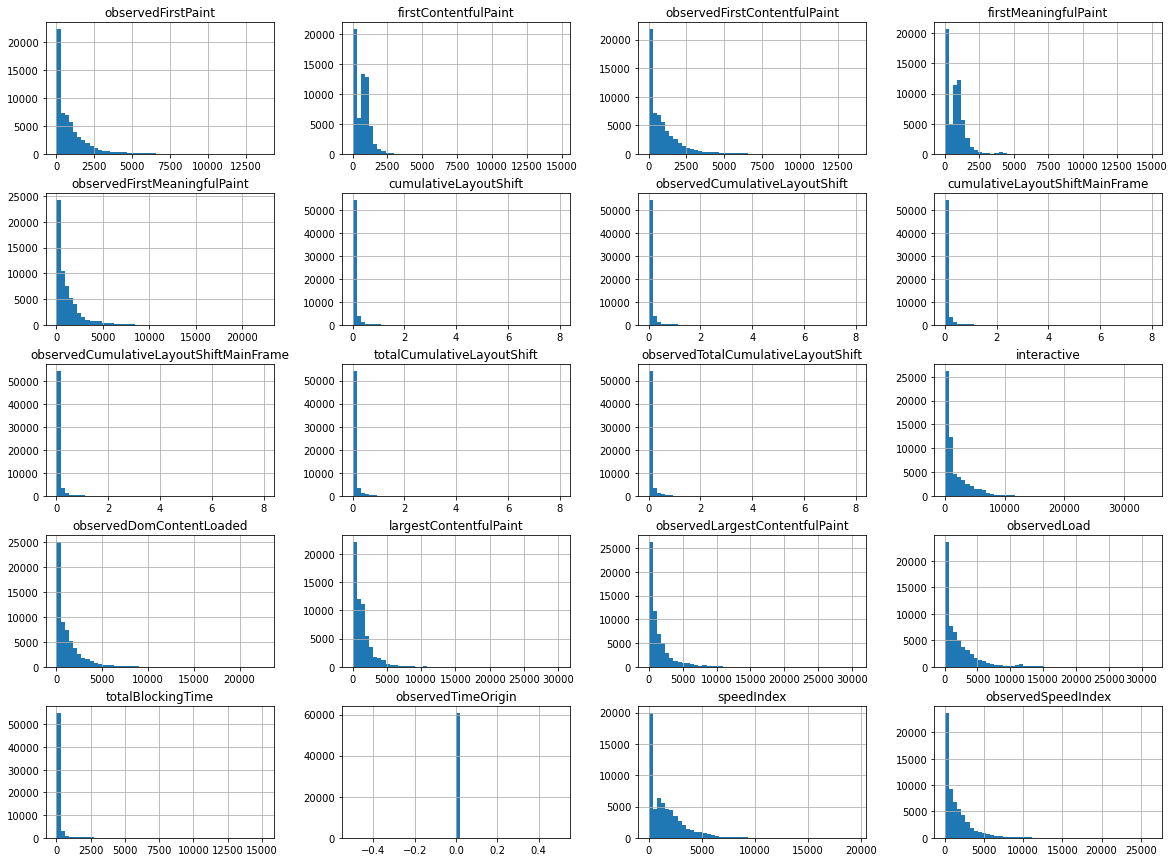

In [70]:
urldata_pm.hist(bins=50, figsize=(20,15))
plt.show()

In [71]:
urldata_pm.corr()

,observedFirstPaint,firstContentfulPaint,observedFirstContentfulPaint,firstMeaningfulPaint,observedFirstMeaningfulPaint,cumulativeLayoutShift,observedCumulativeLayoutShift,cumulativeLayoutShiftMainFrame,observedCumulativeLayoutShiftMainFrame,totalCumulativeLayoutShift,observedTotalCumulativeLayoutShift,interactive,observedDomContentLoaded,largestContentfulPaint,observedLargestContentfulPaint,observedLoad,totalBlockingTime,observedTimeOrigin,speedIndex,observedSpeedIndex
observedFirstPaint,1.000000,0.534961,0.984934,0.442698,0.908881,0.216323,0.216323,0.216766,0.216766,0.216787,0.216787,0.324947,0.910768,0.436768,0.875672,0.748190,0.086143,NaN,0.756242,0.878515
firstContentfulPaint,0.534961,1.000000,0.562039,0.869379,0.564175,0.233035,0.233035,0.232565,0.232565,0.218947,0.218947,0.614642,0.540715,0.701953,0.555596,0.537492,0.253590,NaN,0.734542,0.593232
observedFirstContentfulPaint,0.984934,0.562039,1.000000,0.464281,0.918771,0.213747,0.213747,0.214179,0.214179,0.213941,0.213941,0.336237,0.903356,0.454406,0.883692,0.749412,0.108484,NaN,0.764039,0.878441
firstMeaningfulPaint,0.442698,0.869379,0.464281,1.000000,0.626066,0.206700,0.206700,0.205708,0.205708,0.194458,0.194458,0.652249,0.537384,0.716877,0.574796,0.522172,0.474391,NaN,0.748938,0.608534
observedFirstMeaningfulPaint,0.908881,0.564175,0.918771,0.626066,1.000000,0.220230,0.220230,0.220605,0.220605,0.220685,0.220685,0.417146,0.912013,0.521876,0.910860,0.757438,0.309664,NaN,0.813370,0.908119
cumulativeLayoutShift,0.216323,0.233035,0.213747,0.206700,0.220230,1.000000,1.000000,0.997587,0.997587,0.953299,0.953299,0.225882,0.222502,0.294871,0.238656,0.231346,0.091105,NaN,0.278063,0.255189
observedCumulativeLayoutShift,0.216323,0.233035,0.213747,0.206700,0.220230,1.000000,1.000000,0.997587,0.997587,0.953299,0.953299,0.225882,0.222502,0.294871,0.238656,0.231346,0.091105,NaN,0.278063,0.255189
cumulativeLayoutShiftMainFrame,0.216766,0.232565,0.214179,0.205708,0.220605,0.997587,0.997587,1.000000,1.000000,0.955480,0.955480,0.219691,0.222392,0.291128,0.237816,0.229817,0.087086,NaN,0.274103,0.252725
observedCumulativeLayoutShiftMainFrame,0.216766,0.232565,0.214179,0.205708,0.220605,0.997587,0.997587,1.000000,1.000000,0.955480,0.955480,0.219691,0.222392,0.291128,0.237816,0.229817,0.087086,NaN,0.274103,0.252725
totalCumulativeLayoutShift,0.216787,0.218947,0.213941,0.194458,0.220685,0.953299,0.953299,0.955480,0.955480,1.000000,1.000000,0.215932,0.222744,0.274517,0.238036,0.251256,0.090474,NaN,0.273602,0.257297


In [72]:
urldata_pm = urldata_pm.drop('observedTimeOrigin', axis=1)
urldata_pm

,observedFirstPaint,firstContentfulPaint,observedFirstContentfulPaint,firstMeaningfulPaint,observedFirstMeaningfulPaint,cumulativeLayoutShift,observedCumulativeLayoutShift,cumulativeLayoutShiftMainFrame,observedCumulativeLayoutShiftMainFrame,totalCumulativeLayoutShift,observedTotalCumulativeLayoutShift,interactive,observedDomContentLoaded,largestContentfulPaint,observedLargestContentfulPaint,observedLoad,totalBlockingTime,speedIndex,observedSpeedIndex
0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0
1,684,974,684,974,684,0.022497,0.022497,0.022497,0.022497,0.022497,0.022497,2292,860,1074,684,1598,175,1303,843
2,565,198,565,198,565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,198,560,391,565,806,0,419,579
3,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60995,670,650,670,740,739,0.001931,0.001931,0.001931,0.001931,0.001931,0.001931,740,715,800,739,785,0,733,732
60996,1282,1570,1282,1583,1282,0.005428,0.005428,0.005428,0.005428,0.005428,0.005428,3951,1285,1631,1282,2499,93,3336,3597
60997,1337,1150,1572,1150,1572,0.000422,0.000422,0.000422,0.000422,0.000422,0.000422,2382,2952,2570,1572,3881,55,1893,1657
60998,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0


array([[<AxesSubplot:xlabel='observedFirstPaint', ylabel='observedFirstPaint'>,
        <AxesSubplot:xlabel='firstContentfulPaint', ylabel='observedFirstPaint'>,
        <AxesSubplot:xlabel='observedFirstContentfulPaint', ylabel='observedFirstPaint'>,
        <AxesSubplot:xlabel='firstMeaningfulPaint', ylabel='observedFirstPaint'>,
        <AxesSubplot:xlabel='observedFirstMeaningfulPaint', ylabel='observedFirstPaint'>,
        <AxesSubplot:xlabel='cumulativeLayoutShift', ylabel='observedFirstPaint'>,
        <AxesSubplot:xlabel='observedCumulativeLayoutShift', ylabel='observedFirstPaint'>,
        <AxesSubplot:xlabel='cumulativeLayoutShiftMainFrame', ylabel='observedFirstPaint'>,
        <AxesSubplot:xlabel='observedCumulativeLayoutShiftMainFrame', ylabel='observedFirstPaint'>,
        <AxesSubplot:xlabel='totalCumulativeLayoutShift', ylabel='observedFirstPaint'>,
        <AxesSubplot:xlabel='observedTotalCumulativeLayoutShift', ylabel='observedFirstPaint'>,
        <AxesSubplot:xlabe

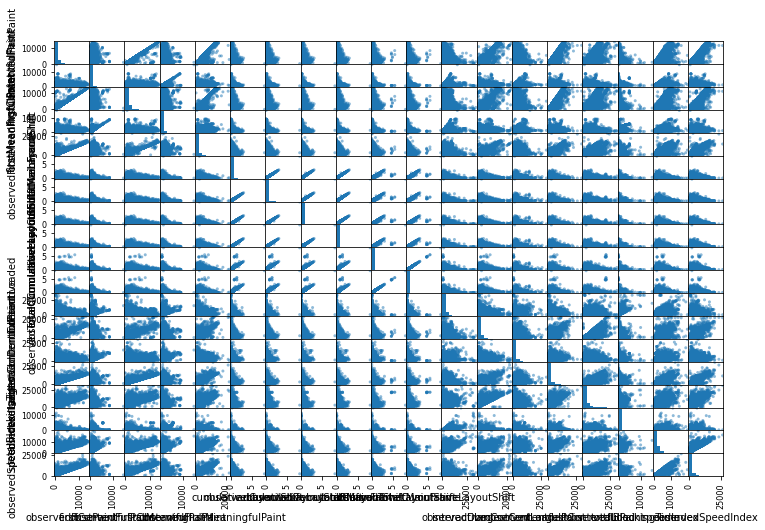

In [74]:
scatter_matrix(urldata_pm, figsize=(12,8))

In [78]:
df = pd.read_csv('urldata_nlp.csv')
def type_encoder(x):
    if x == 'malicious':
        return 1
    elif x == 'benign':
        return 0
    else:
        return x

df['target'] = df['type'].apply(lambda x: type_encoder(x))

df[['type', 'target']]
y= df['target'][:61000]
y

0        1
1        0
2        0
3        1
4        1
        ..
60995    0
60996    1
60997    0
60998    0
60999    0
Name: target, Length: 61000, dtype: int64

In [79]:
scaler = MinMaxScaler()

In [87]:
pipeline = ColumnTransformer([
("num", scaler,cols)])

In [102]:
filename = 'pm_pipeline.sav'
pickle.dump(pipeline, open(filename, 'wb'))

In [88]:
X = pipeline.fit_transform(urldata_pm)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [92]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_pm=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_pm.fit(X_train, y_train)  #model
#Predict y value for test dataset
y_predict = lr_pm.predict(X_test)
y_prob = lr_pm.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      9087
           1       0.56      0.00      0.00      3113

    accuracy                           0.74     12200
   macro avg       0.65      0.50      0.43     12200
weighted avg       0.70      0.74      0.64     12200

Confusion Matrix: [[9083    4]
 [3108    5]]
AUC: 0.5860091394069769


In [93]:
filename = 'lr_pm_model.sav'
pickle.dump(lr_pm, open(filename, 'wb'))

In [94]:
nb_pm = MultinomialNB()
nb_pm.fit(X_train, y_train)  
#Predict y value for test dataset
y_predict = nb_pm.predict(X_test)
y_prob = nb_pm.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      9087
           1       0.00      0.00      0.00      3113

    accuracy                           0.74     12200
   macro avg       0.37      0.50      0.43     12200
weighted avg       0.55      0.74      0.64     12200

Confusion Matrix: [[9087    0]
 [3113    0]]
AUC: 0.5487843695050356


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
rf_pm =  RandomForestClassifier(n_estimators=100)
rf_pm.fit(X_train,y_train)
y_pred = rf_pm.predict(X_test)
y_prob = rf_pm.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test, y_pred))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.76      0.97      0.85      9087
           1       0.53      0.11      0.18      3113

    accuracy                           0.75     12200
   macro avg       0.65      0.54      0.52     12200
weighted avg       0.70      0.75      0.68     12200

Confusion Matrix: [[8788  299]
 [2772  341]]
AUC: 0.6285066359453293


In [96]:
filename = 'rf_pm_model.sav'
pickle.dump(rf_pm, open(filename, 'wb'))

In [97]:
adaB_pm = AdaBoostClassifier()
adaB_pm.fit(X_train,y_train)
y_pred = adaB_pm.predict(X_test)
y_prob = adaB_pm.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test, y_pred))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      9087
           1       0.35      0.00      0.00      3113

    accuracy                           0.74     12200
   macro avg       0.55      0.50      0.43     12200
weighted avg       0.64      0.74      0.64     12200

Confusion Matrix: [[9076   11]
 [3107    6]]
AUC: 0.5985287631278623


In [98]:
xgb_pm= xgb.XGBClassifier(n_estimators= 1000)
xgb_pm.fit(X_train,y_train)
y_pred = xgb_pm.predict(X_test)
y_prob = xgb_pm.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test, y_pred))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.76      0.95      0.84      9087
           1       0.46      0.12      0.20      3113

    accuracy                           0.74     12200
   macro avg       0.61      0.54      0.52     12200
weighted avg       0.68      0.74      0.68     12200

Confusion Matrix: [[8628  459]
 [2726  387]]
AUC: 0.6226175665430128


In [99]:
filename = 'xgB_pm_model.sav'
pickle.dump(xgb_pm, open(filename, 'wb'))

In [100]:
svm_pm = svm.SVC(probability=True)
svm_pm.fit(X_train, y_train)

#Predict y value for test dataset
y_predict = svm_pm.predict(X_test)
y_prob = svm_pm.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      9087
           1       0.77      0.00      0.01      3113

    accuracy                           0.75     12200
   macro avg       0.76      0.50      0.43     12200
weighted avg       0.75      0.75      0.64     12200

Confusion Matrix: [[9084    3]
 [3103   10]]
AUC: 0.5111580841952852


In [101]:
filename = 'svm_pm_model.sav'
pickle.dump(svm_pm, open(filename, 'wb'))